# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('50_Startups.csv')

## Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

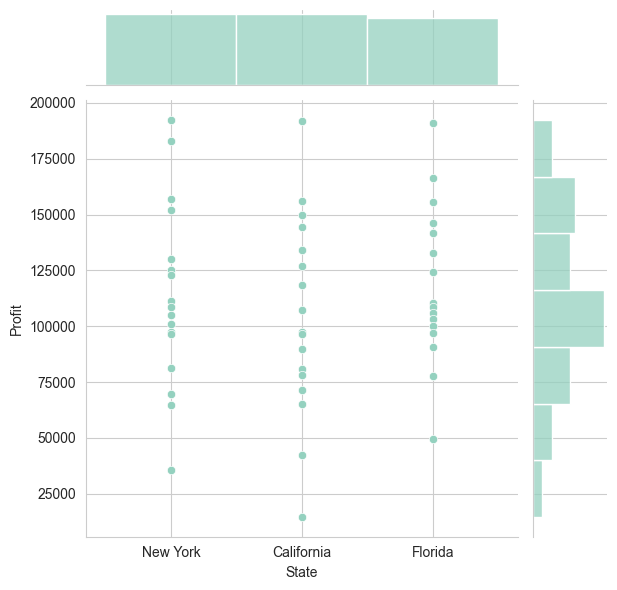

In [10]:
sns.jointplot(x='State',y='Profit',data=df)

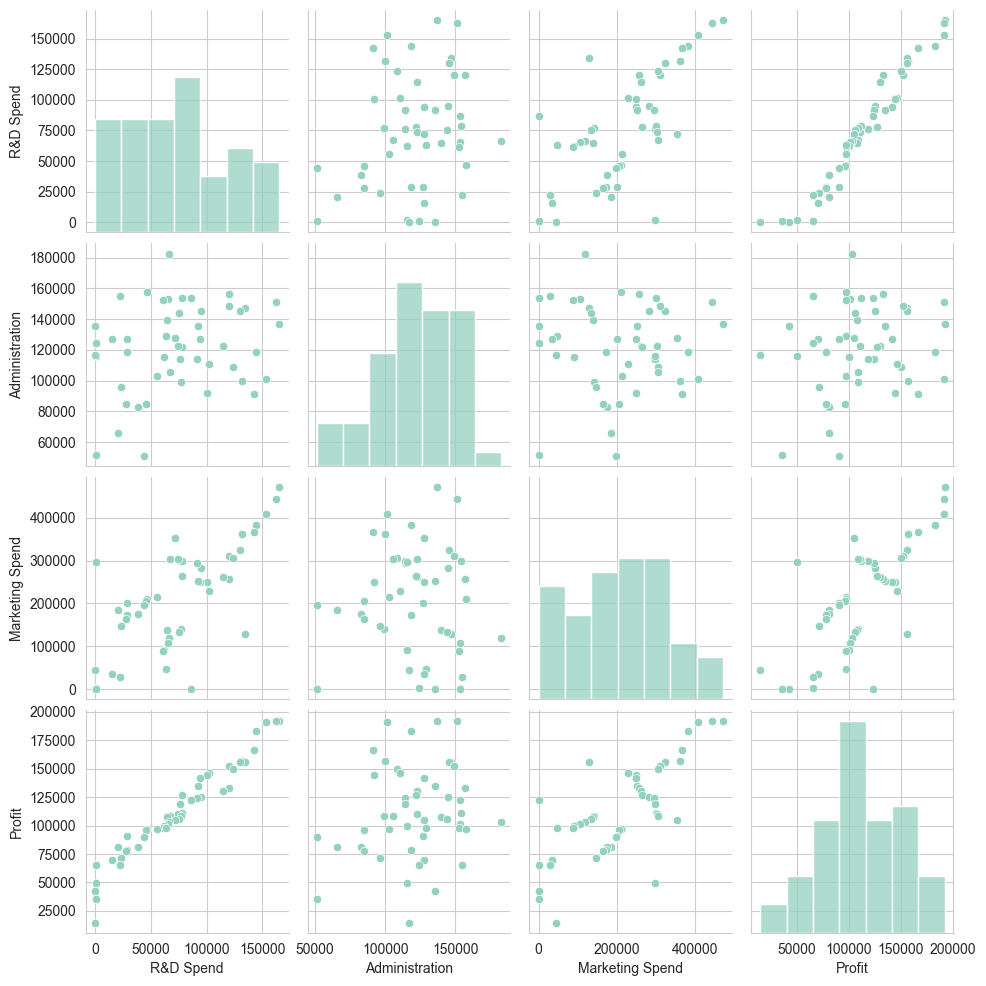

In [14]:
sns.pairplot(df)

In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


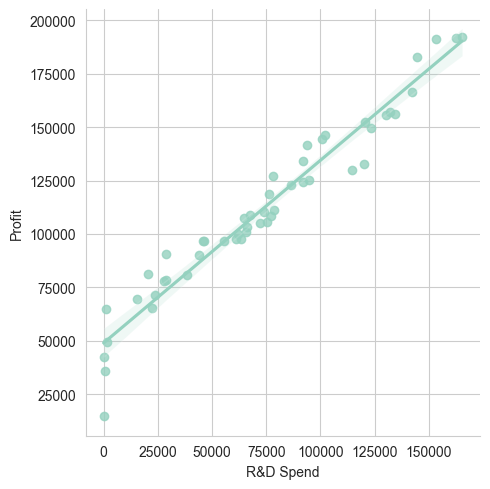

In [18]:
sns.lmplot(x='R&D Spend',y='Profit',data=df)

## Training and testing data

In [20]:
df.columns.tolist()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [21]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
Y= df['Profit']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [24]:
Y_test

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
1     191792.06
26    105733.54
46     49490.75
42     71498.49
47     42559.73
16    126992.93
24    108552.04
7     155752.60
45     64926.08
18    124266.90
Name: Profit, dtype: float64

## Training Model

In [25]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [28]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [29]:
lm.fit(X_train, Y_train)

LinearRegression()

**Print out the coefficients of the model**

In [30]:
print('Coefficient : \n',lm.coef_)

Coefficient : 
 [0.80001714 0.01144211 0.03778787]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [33]:
prediction = lm.predict(X_test)

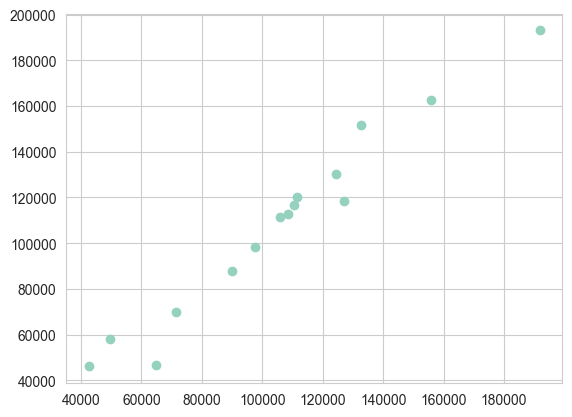

In [34]:
plt.scatter(Y_test,prediction)

In [37]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,prediction)
score

0.9482872583672086

In [39]:
from sklearn import metrics

In [40]:
print("MAE :",metrics.mean_absolute_error(Y_test,prediction))
print("MSE :",metrics.mean_squared_error(Y_test,prediction))
print("RMSE :",np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE : 6805.008167431941
MSE : 75138128.88555433
RMSE : 8668.22524427892
